In [222]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

data = pd.read_csv("D:\Projects\L3PP_AI_ML\data\Mumbai_House_Prices.csv")
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [223]:
data = data[data['status'] == 'Ready to move']
data.drop(columns=['status', 'age', 'locality'], inplace=True)

In [224]:
region_to_change = data['region'].value_counts() <= 10
region_to_change = region_to_change[region_to_change == True]
region_to_change.head()

region
Kanjurmarg East      True
Thane East           True
Koproli              True
Sector 20 Kamothe    True
Dahisar West         True
Name: count, dtype: bool

In [225]:
data['region'] = data['region'].apply(lambda x: 'other' if x in region_to_change else x)
data['region'].value_counts().head()

region
Thane West        10929
Mira Road East     5780
Kharghar           1708
Kandivali East     1419
Andheri West       1397
Name: count, dtype: int64

In [226]:
# data = data[data['type'] == 'Apartment']
# data = data[data['bhk'] <= 3]
data.drop_duplicates(inplace=True)
data.loc[data['price_unit'] == 'Cr', 'price'] *= 10000000
data.loc[data['price_unit'] == 'L', 'price'] *= 100000
data.drop(columns=['price_unit'], inplace=True)

# data.loc[data['region'].isin(['Andheri West', 'Andheri East', 'Santacruz East', 'Santacruz West', 'Mahim', 'Prabhadevi', 'Dadar West', 'Dadar East', 'Wadala', 'Lower Parel', 'Byculla', 'Marine Lines', 'Mazagaon', 'Worli', 'Churchgate', 'Kamathipura', 'Peddar Road', 'Shahapur', 'Babulnath Road', 'Malabar Hill', 'Tardeo', 'Girgaon', 'Cuffe Parade', 'Napeansea Road', 'Nalasopara East', 'Juhu', 'Powai']), 'region'] = 'Central Mumbai'
# data.loc[data['region'].isin(['Bandra West', 'Bandra East', 'Borivali West', 'Borivali East', 'Kandivali West', 'Kandivali East', 'Malad West', 'Malad East', 'Sion', 'Goregaon West', 'Goregaon East', 'Versova', 'Vile Parle West', 'Vile Parle East', 'Andheri West', 'Andheri East']), 'region'] = 'Western Suburbs'
# data.loc[data['region'].isin(['Ghatkopar West', 'Ghatkopar East', 'Kurla', 'Kurla East', 'Chembur', 'Bhandup East', 'Bhandup West', 'Mira Road', 'Mulund East', 'Mulund West', 'Kanjurmarg', 'Vikhroli East', 'Vikhroli West', 'Kalyan East', 'Kalyan West', 'Vasind', 'Navi Mumbai', 'Goregaon West', 'Vasai East', 'Kamothe']), 'region'] = 'Eastern Suburbs'
# data.loc[data['region'].isin(['Navi Mumbai', 'Taloja', 'Ulwe', 'Kharghar', 'Panvel', 'Seawoods', 'Khopoli', 'Dombivli', 'Boisar', 'Tardeo', 'Vasai', 'Ghansoli', 'Koparkhairane', 'Airoli', 'Kharghar', 'Vashi', 'Sanpada']), 'region'] = 'Navi Mumbai & Beyond'
# data.loc[data['region'].isin(['Badlapur', 'Badlapur East', 'Badlapur West', 'Nerul', 'Sector 21 Nerul', 'Dahisar', 'Vasai West', 'Sector 14 Vashi', 'Nalasopara West', 'Virar East', 'Virar West', 'Karjat', 'Shil Phata', 'Ambarnath', 'Ulhasnagar', 'Bhayandar East', 'Bhayandar West', 'Sewri', 'Mumbra', 'Taloje', 'Rasayani', 'Saphale', 'Kasheli', 'Uran', 'Palava', 'Vichumbe', 'Dombivali', 'Virar', 'Thane West', 'Mira Road East', 'Ambernath East']), 'region'] = 'Outskirts'
# data = data[data['region'].isin(['Central Mumbai', 'Western Suburbs', 'Eastern Suburbs', 'Navi Mumbai & Beyond', 'Outskirts'])]

# df_encoded = pd.get_dummies(data, columns=['region'], prefix='region')
# df_encoded = pd.get_dummies(df_encoded, columns=['bhk'], prefix='bhk')
# df_encoded = df_encoded.astype(int, errors='ignore')
data.head()

,bhk,type,area,price,region
0,3,Apartment,685,25000000.0,Andheri West
8,1,Apartment,396,2984000.0,Badlapur East
17,3,Apartment,1259,28000000.0,Ghansoli
26,2,Apartment,1080,5724000.0,Bhiwandi
29,2,Apartment,594,3450000.0,Ambernath West


<Axes: xlabel='price', ylabel='Density'>

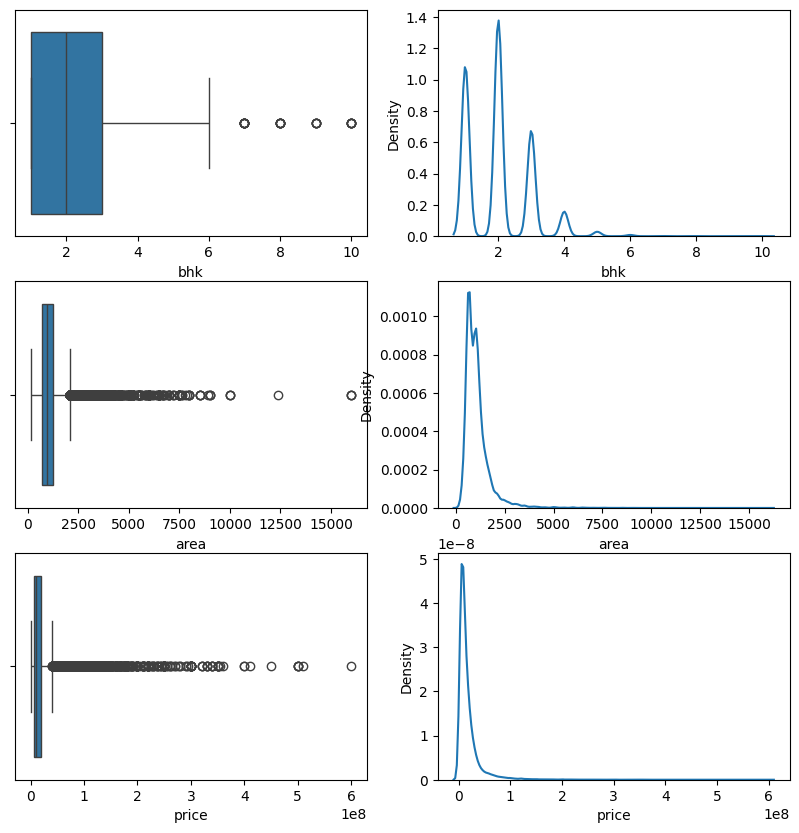

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(x=data["bhk"])

plt.subplot(3,2,2)
sns.kdeplot(x=data["bhk"])


plt.subplot(3,2,3)
sns.boxplot(x=data["area"])

plt.subplot(3,2,4)
sns.kdeplot(x=data["area"])


plt.subplot(3,2,5)
sns.boxplot(x=data["price"])

plt.subplot(3,2,6)
sns.kdeplot(x=data["price"])

In [ ]:
for col_name in ['bhk', 'area', 'price']:
    print("For ",col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - (iqr * 1.5)
    upper_limit = q3 + (iqr * 1.5)
    print("Q1: {}\nQ3: {}\nLower limit: {}\nUpper limit: {}".format(q1, q3, lower_limit, upper_limit))

    data = data[(data[col_name] > lower_limit) & (data[col_name] < upper_limit)]
    print(data[col_name].describe())

data.shape

For  bhk
Q1: 1.0
Q3: 3.0
Lower limit: -2.0
Upper limit: 6.0
<bound method Series.max of count    28918.000000
mean         1.995885
std          0.891696
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bhk, dtype: float64>
For  area
Q1: 675.0
Q3: 1229.0
Lower limit: -156.0
Upper limit: 2060.0
<bound method Series.max of count    27316.000000
mean       952.984954
std        362.322097
min        149.000000
25%        665.000000
50%        910.000000
75%       1156.000000
max       2055.000000
Name: area, dtype: float64>
For  price
Q1: 6000000.0
Q3: 18000000.0
Lower limit: -12000000.0
Upper limit: 36000000.0
<bound method Series.max of count    2.576600e+04
mean     1.176700e+07
std      7.827797e+06
min      4.490000e+05
25%      5.800000e+06
50%      9.500000e+06
75%      1.650000e+07
max      3.590000e+07
Name: price, dtype: float64>


(25766, 5)

In [229]:
data.to_csv('Mumbai_Filtered_Data.csv')
print('Data saved to CSV file')
data.head()

Data saved to CSV file


,bhk,type,area,price,region
0,3,Apartment,685,25000000.0,Andheri West
8,1,Apartment,396,2984000.0,Badlapur East
17,3,Apartment,1259,28000000.0,Ghansoli
26,2,Apartment,1080,5724000.0,Bhiwandi
29,2,Apartment,594,3450000.0,Ambernath West


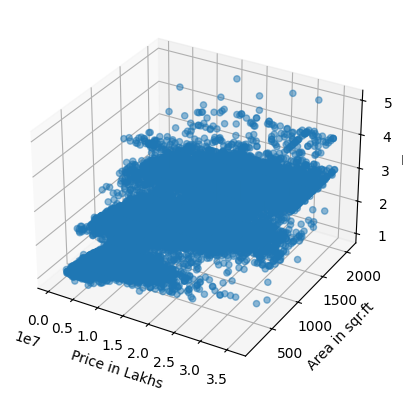

In [230]:
dataX = data['price']
dataY = data['area']
dataZ = data['bhk']

# Create a figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(dataX, dataY, dataZ, alpha=0.5)

# Add labels
ax.set_xlabel('Price in Lakhs')
ax.set_ylabel('Area in sqr.ft')
ax.set_zlabel('BHK')

# Show the plot
plt.show()


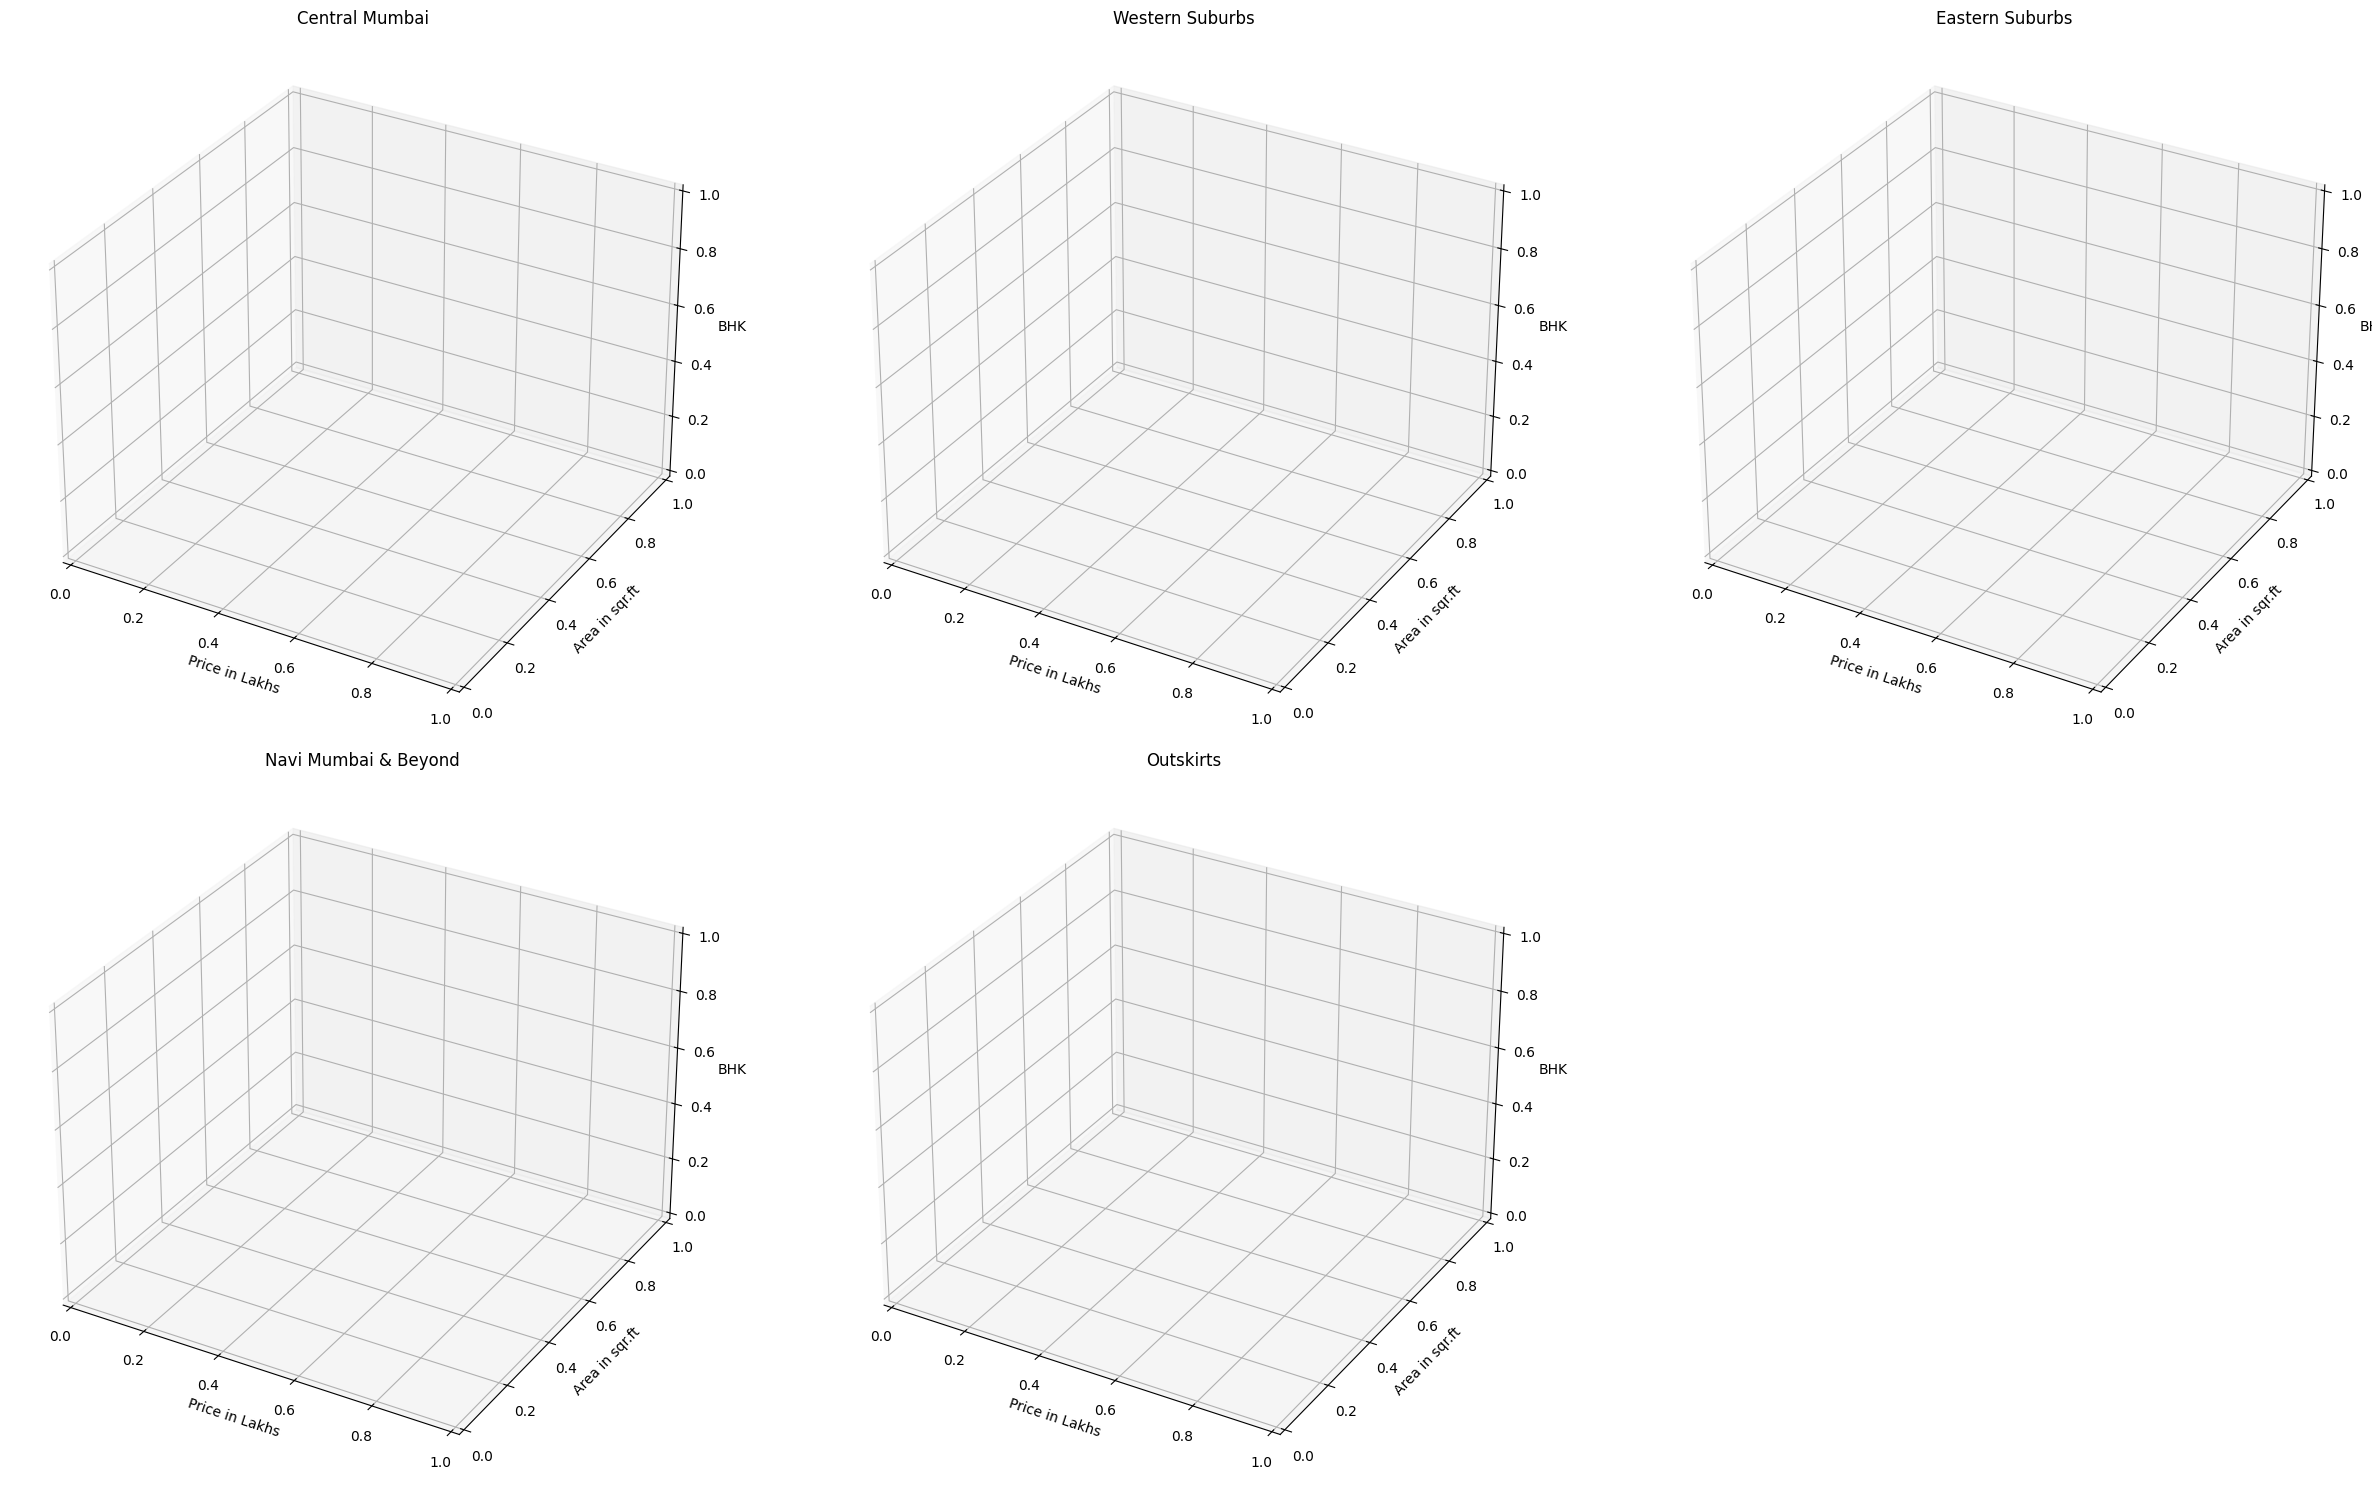

In [231]:
central_Mumbai = data[data['region'] == 'Central Mumbai']
western_Suburbs = data[data['region'] == 'Western Suburbs']
eastern_Suburbs = data[data['region'] == 'Eastern Suburbs']
navi_Mumbai = data[data['region'] == 'Navi Mumbai & Beyond']
outskirts = data[data['region'] == 'Outskirts']

total_data = [central_Mumbai, western_Suburbs, eastern_Suburbs, navi_Mumbai, outskirts]

# Create a figure with 3 horizontal & 2 vertical subplots
fig, axes = plt.subplots(2, 3, figsize=(25, 15), subplot_kw={'projection': '3d'})

# Region names for titles
region_names = ['Central Mumbai', 'Western Suburbs', 'Eastern Suburbs', 'Navi Mumbai & Beyond', 'Outskirts']

# Plot each region
for i, (data, title) in enumerate(zip(total_data, region_names)):
    row = i // 3
    col = i % 3
    scatters = axes[row, col].scatter(data['price'], data['area'], data['bhk'], alpha=0.5)
    axes[row, col].set_xlabel('Price in Lakhs')
    axes[row, col].set_ylabel('Area in sqr.ft')
    axes[row, col].set_zlabel('BHK')
    axes[row, col].set_title(title)

#Remove 6th empty plot
plt.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, r2_score
import numpy as np


Data_X = df_encoded.drop(columns=['price'])
Data_Y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

print(X_train_poly[0, :])

# for i in range(1,5):
#     # Create Polynomial Features
#     poly = PolynomialFeatures(degree=i, include_bias=False)  # Degree 2 means up to x², x₁x₂, etc.
#     X_train_poly = poly.fit_transform(X_train)
#     X_test_poly = poly.transform(X_test)

#     # Train a Linear Regression model on the un-transformed features
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Train a Linear Regression model on the transformed features
#     model.fit(X_train_poly, y_train)
#     # Make predictions
#     y_pred = model.predict(X_test_poly)

#     # Calculate metrics
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mse**0.5  # or mse**(1/2)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print(f"Degree: {i}")
#     print(f"MSE: {mse}")
#     print(f"RMSE: {rmse}")
#     print(f"MAE: {mae}")
#     print(f"R-squared: {r2}")


#     # Create DataFrame with both predictions and actual values
#     comparison_df = pd.DataFrame({
#         'Actual_Price': y_test[:10],
#         'Predicted_Price': y_pred[:10]
#     })

#     # print(X_train_poly[:10]-X_train.iloc[:10])

#     comparison_df['Difference'] = comparison_df['Predicted_Price'] - comparison_df['Actual_Price']
#     print(comparison_df)

#     # Create plot for each degree
#     plt.figure(figsize=(6, 4))
    
#     # # Plot original data
#     # plt.scatter(X_train.iloc[:, 0], y_train, color='blue', alpha=0.8, label='Original Data')    

#     # # Plot transformed data
#     # plt.scatter(X_train_poly[:, 0], y_train, color='red', alpha=0.2, label='Transformed Data')

#     plt.scatter(X_train.iloc[:, 0], X_train_poly[:, 0], alpha=0.5, label='Y data')
    
#     plt.title('Test data VS Predicted data')
#     plt.xlabel('Y Test')
#     plt.ylabel('Y Predicted')
#     plt.legend()
#     plt.grid(True)
#     plt.axis('equal')
#     plt.show()

NameError: name 'df_encoded' is not defined